In [ ]:
import pandas as clickbait_panns
import matplotlib.pyplot as clickbait_mat
import numpy as clickbait_nmp
import warnings as clickbait_wngs
clickbait_wngs.filterwarnings('ignore')

load_clickbait = 'clickbait_detection_file.csv'
click_bait_detection = clickbait_panns.read_csv(load_clickbait)
print("\nShape of Clickbait Data:", click_bait_detection.shape)
click_bait_detection.head()


Shape of Clickbait Data: (32000, 3)


,headline,clickbait,Processed_Headline
0,Should I Get Bings,1,get bing
1,Which TV Female Friend Group Do You Belong In,1,tv femal friend group belong
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1,new star war forc awaken trailer give chill
3,"This Vine Of New York On ""Celebrity Big Brothe...",1,vine new york celebr big brother fuck perfect
4,A Couple Did A Stunning Photo Shoot With Their...,1,coupl stun photo shoot babi learn inoper brain...


### TFIDF Vectorization Technique

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer as clickbait_tfidfvec
click_bait_Xi = click_bait_detection['Processed_Headline']
click_bait_Yo = click_bait_detection['clickbait']
print("Output Class Labels of Clickbait:\n",click_bait_Yo.value_counts())

click_bait_vector = clickbait_tfidfvec(analyzer='word', max_features=2000)
click_bait_Xi = click_bait_vector.fit_transform(click_bait_detection['Processed_Headline'].values.astype('U')).toarray()
print("\nClickbait Data vectorized using TFIDF: ",click_bait_Xi.shape)

Output Class Labels of Clickbait:
 clickbait
0    16001
1    15999
Name: count, dtype: int64

Clickbait Data vectorized using TFIDF:  (32000, 2000)


In [ ]:
from sklearn.model_selection import GridSearchCV as click_bait_gscv
from sklearn.metrics import ConfusionMatrixDisplay as click_bait_cfmdsp
from sklearn.metrics import classification_report as click_bait_clasficrp
from sklearn.metrics import confusion_matrix as click_bait_cfmtx
from sklearn import metrics as click_bait_met
from sklearn.model_selection import train_test_split as click_bait_tvts

click_bait_Xitr, click_bait_Xits, click_bait_Yotr, click_bait_Yots = click_bait_tvts(click_bait_Xi, click_bait_Yo, random_state=52, test_size=0.4)
click_bait_Xivn, click_bait_Xits, click_bait_Yovn, click_bait_Yots = click_bait_tvts(click_bait_Xits, click_bait_Yots, random_state=52, test_size=0.5)
print("Samples of Training  : ",click_bait_Xitr.shape, click_bait_Yotr.shape)
print("Samples of Validation: ",click_bait_Xivn.shape, click_bait_Yovn.shape)
print("Samples of Testing   : ",click_bait_Xits.shape, click_bait_Yots.shape)

Samples of Training  :  (19200, 2000) (19200,)
Samples of Validation:  (6400, 2000) (6400,)
Samples of Testing   :  (6400, 2000) (6400,)


In [ ]:
###-- nonzero values and their indices
clickbait_nonzero_indices = clickbait_nmp.nonzero(click_bait_Xi[4])[0]
clickbait_nonzero_values = click_bait_Xi[4][clickbait_nonzero_indices]

print("Indices of nonzero values in the 5th row:\n", clickbait_nonzero_indices)
print("\nCorresponding nonzero values:\n", clickbait_nonzero_values)

Indices of nonzero values in the 5th row:
 [ 189  274  456 1062 1319 1599 1707]

Corresponding nonzero values:
 [0.35555677 0.43890053 0.35137551 0.39387421 0.30258408 0.36990265
 0.41708389]


### SVM

In [ ]:
from sklearn.svm import SVC as click_bait_support_vm

click_bait_parameter = {'degree': [5, 9, 10],
                      'gamma':['scale','auto'],
                      'kernel': ['linear','poly','rbf'],
                       }

click_bait_MDL = click_bait_support_vm(random_state=52)
click_bait_MDL = click_bait_gscv(estimator=click_bait_MDL, param_grid=click_bait_parameter, cv=2)
click_bait_MDL.fit(click_bait_Xitr[:600], click_bait_Yotr[:600])

print("SVM Best Parameters --- Clickbait Detection:")
print(click_bait_MDL.best_params_)

click_bait_MDL = click_bait_MDL.best_estimator_
click_bait_MDL.fit(click_bait_Xitr, click_bait_Yotr)

SVM Best Parameters --- Clickbait Detection:
{'degree': 5, 'gamma': 'scale', 'kernel': 'linear'}


SVC(degree=5, kernel='linear', random_state=52)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3192
           1       0.95      0.93      0.94      3208

    accuracy                           0.94      6400
   macro avg       0.94      0.94      0.94      6400
weighted avg       0.94      0.94      0.94      6400



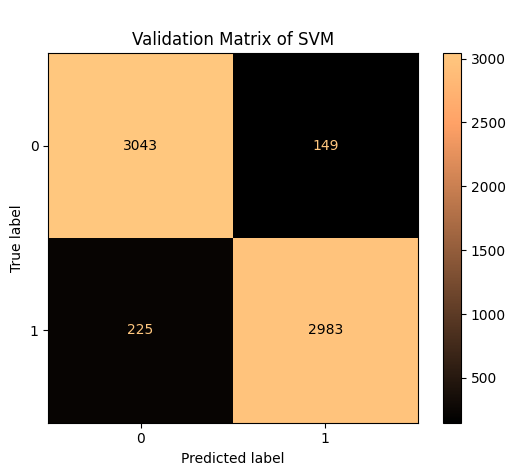

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3230
           1       0.95      0.92      0.94      3170

    accuracy                           0.94      6400
   macro avg       0.94      0.94      0.94      6400
weighted avg       0.94      0.94      0.94      6400



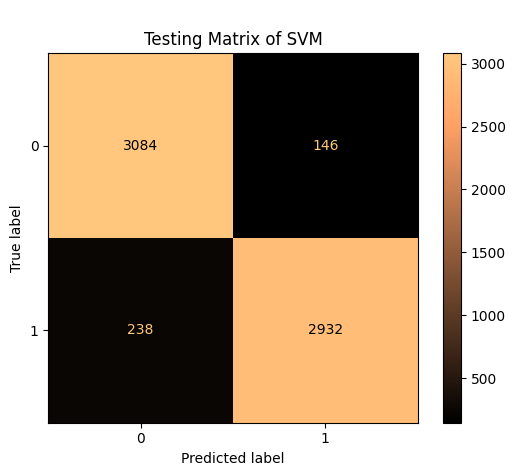

In [ ]:
click_bait_Yoprd = click_bait_MDL.predict(click_bait_Xivn)
print(click_bait_clasficrp(click_bait_Yovn, click_bait_Yoprd))

click_bait_mx = click_bait_cfmtx(click_bait_Yovn, click_bait_Yoprd)
click_bait_cfmdsp(confusion_matrix=click_bait_mx, display_labels=[0, 1]).plot(cmap='copper')
clickbait_mat.title('\nValidation Matrix of SVM')
clickbait_mat.show()

click_bait_Yoprd = click_bait_MDL.predict(click_bait_Xits)
print(click_bait_clasficrp(click_bait_Yots, click_bait_Yoprd))

click_bait_mx = click_bait_cfmtx(click_bait_Yots, click_bait_Yoprd)
click_bait_cfmdsp(confusion_matrix=click_bait_mx, display_labels=[0, 1]).plot(cmap='copper')
clickbait_mat.title('\nTesting Matrix of SVM')
clickbait_mat.show()

### LR

In [ ]:
from sklearn.linear_model import LogisticRegression as click_bait_logistic

click_bait_parameter = {'C': [0.1, 0.2, 0.3],
                        'penalty':['l2','elasticnet','l1'],
                        'solver': ['sag','saga', 'liblinear','newton-cg', 'newton-cholesky']
                       }

click_bait_MDL = click_bait_logistic(random_state=52)
click_bait_MDL = click_bait_gscv(estimator=click_bait_MDL, param_grid=click_bait_parameter, cv=2)
click_bait_MDL.fit(click_bait_Xitr[:600], click_bait_Yotr[:600])

print("LR Best Parameters --- Clickbait Detection:")
print(click_bait_MDL.best_params_)

click_bait_MDL = click_bait_MDL.best_estimator_
click_bait_MDL.fit(click_bait_Xitr, click_bait_Yotr)

LR Best Parameters --- Clickbait Detection:
{'C': 0.3, 'penalty': 'l2', 'solver': 'liblinear'}


LogisticRegression(C=0.3, random_state=52, solver='liblinear')

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3192
           1       0.95      0.91      0.93      3208

    accuracy                           0.94      6400
   macro avg       0.94      0.94      0.94      6400
weighted avg       0.94      0.94      0.94      6400



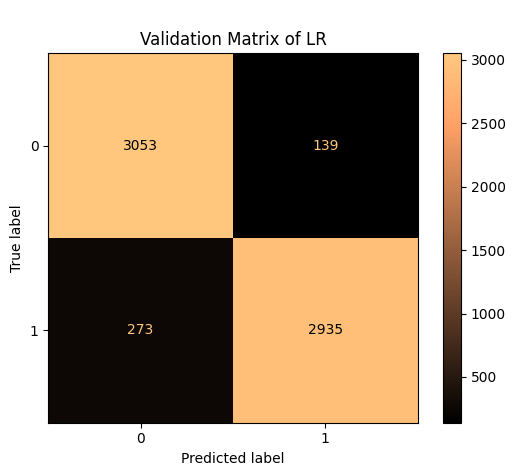

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3230
           1       0.96      0.91      0.93      3170

    accuracy                           0.94      6400
   macro avg       0.94      0.94      0.94      6400
weighted avg       0.94      0.94      0.94      6400



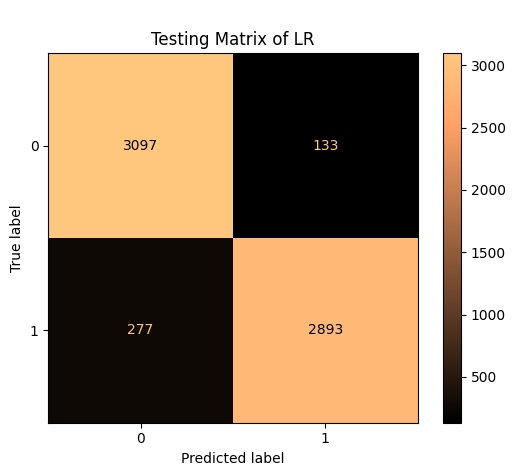

In [ ]:
click_bait_Yoprd = click_bait_MDL.predict(click_bait_Xivn)
print(click_bait_clasficrp(click_bait_Yovn, click_bait_Yoprd))

click_bait_mx = click_bait_cfmtx(click_bait_Yovn, click_bait_Yoprd)
click_bait_cfmdsp(confusion_matrix=click_bait_mx, display_labels=[0, 1]).plot(cmap='copper')
clickbait_mat.title('\nValidation Matrix of LR')
clickbait_mat.show()

click_bait_Yoprd = click_bait_MDL.predict(click_bait_Xits)
print(click_bait_clasficrp(click_bait_Yots, click_bait_Yoprd))

click_bait_mx = click_bait_cfmtx(click_bait_Yots, click_bait_Yoprd)
click_bait_cfmdsp(confusion_matrix=click_bait_mx, display_labels=[0, 1]).plot(cmap='copper')
clickbait_mat.title('\nTesting Matrix of LR')
clickbait_mat.show()

### RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier as click_bait_forest

click_bait_parameter = {'max_depth': [5, 9, 10],
                      'n_estimators':[300, 100, 50],
                      'criterion': ['gini','log_loss','entropy'],
                       }

click_bait_MDL = click_bait_forest(random_state=52)
click_bait_MDL = click_bait_gscv(estimator=click_bait_MDL, param_grid=click_bait_parameter, cv=2)
click_bait_MDL.fit(click_bait_Xitr[:600], click_bait_Yotr[:600])

print("RF Best Parameters --- Clickbait Detection:")
print(click_bait_MDL.best_params_)

click_bait_MDL = click_bait_MDL.best_estimator_
click_bait_MDL.fit(click_bait_Xitr, click_bait_Yotr)

RF Best Parameters --- Clickbait Detection:
{'criterion': 'log_loss', 'max_depth': 10, 'n_estimators': 300}


RandomForestClassifier(criterion='log_loss', max_depth=10, n_estimators=300,
                       random_state=52)

              precision    recall  f1-score   support

           0       0.75      0.96      0.84      3192
           1       0.95      0.67      0.79      3208

    accuracy                           0.82      6400
   macro avg       0.85      0.82      0.81      6400
weighted avg       0.85      0.82      0.81      6400



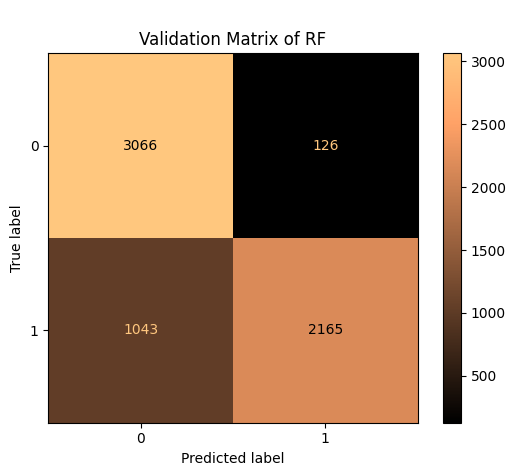

              precision    recall  f1-score   support

           0       0.75      0.97      0.84      3230
           1       0.95      0.67      0.78      3170

    accuracy                           0.82      6400
   macro avg       0.85      0.82      0.81      6400
weighted avg       0.85      0.82      0.81      6400



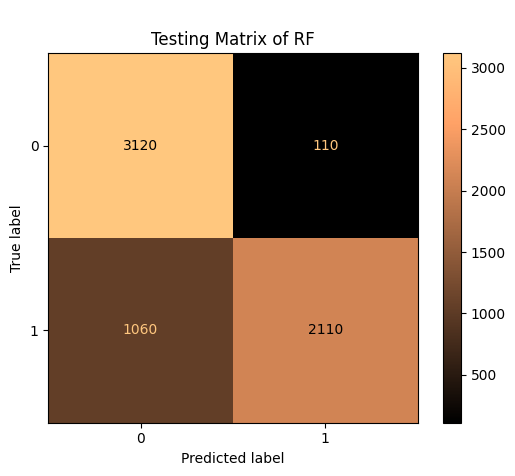

In [ ]:
click_bait_Yoprd = click_bait_MDL.predict(click_bait_Xivn)
print(click_bait_clasficrp(click_bait_Yovn, click_bait_Yoprd))

click_bait_mx = click_bait_cfmtx(click_bait_Yovn, click_bait_Yoprd)
click_bait_cfmdsp(confusion_matrix=click_bait_mx, display_labels=[0, 1]).plot(cmap='copper')
clickbait_mat.title('\nValidation Matrix of RF')
clickbait_mat.show()

click_bait_Yoprd = click_bait_MDL.predict(click_bait_Xits)
print(click_bait_clasficrp(click_bait_Yots, click_bait_Yoprd))

click_bait_mx = click_bait_cfmtx(click_bait_Yots, click_bait_Yoprd)
click_bait_cfmdsp(confusion_matrix=click_bait_mx, display_labels=[0, 1]).plot(cmap='copper')
clickbait_mat.title('\nTesting Matrix of RF')
clickbait_mat.show()

### XGB

In [ ]:
from xgboost import XGBClassifier as click_bait_xtreme

click_bait_parameter = {'booster': ['gbtree','gblinear','dart'],
                      'max_depth':[5, 9, 10],
                      'min_child_weight': [1, 4, 8]
                       }

click_bait_MDL = click_bait_xtreme(random_state=52)
click_bait_MDL = click_bait_gscv(estimator=click_bait_MDL, param_grid=click_bait_parameter, cv=2)
click_bait_MDL.fit(click_bait_Xitr[:600], click_bait_Yotr[:600])

print("XGB Best Parameters --- Clickbait Detection:")
print(click_bait_MDL.best_params_)

click_bait_MDL = click_bait_MDL.best_estimator_
click_bait_MDL.fit(click_bait_Xitr, click_bait_Yotr)

XGB Best Parameters --- Clickbait Detection:
{'booster': 'gblinear', 'max_depth': 9, 'min_child_weight': 8}


XGBClassifier(base_score=None, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=8, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=52, ...)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3192
           1       0.92      0.92      0.92      3208

    accuracy                           0.92      6400
   macro avg       0.92      0.92      0.92      6400
weighted avg       0.92      0.92      0.92      6400



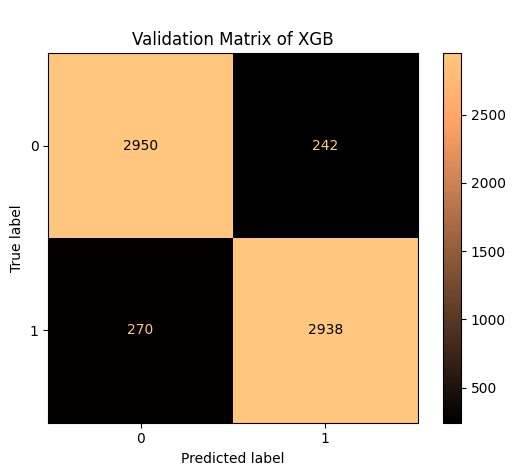

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      3230
           1       0.92      0.91      0.92      3170

    accuracy                           0.92      6400
   macro avg       0.92      0.92      0.92      6400
weighted avg       0.92      0.92      0.92      6400



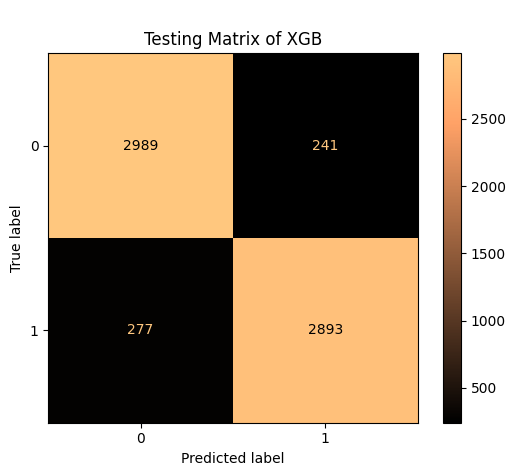

In [ ]:
click_bait_Yoprd = click_bait_MDL.predict(click_bait_Xivn)
print(click_bait_clasficrp(click_bait_Yovn, click_bait_Yoprd))

click_bait_mx = click_bait_cfmtx(click_bait_Yovn, click_bait_Yoprd)
click_bait_cfmdsp(confusion_matrix=click_bait_mx, display_labels=[0, 1]).plot(cmap='copper')
clickbait_mat.title('\nValidation Matrix of XGB')
clickbait_mat.show()

click_bait_Yoprd = click_bait_MDL.predict(click_bait_Xits)
print(click_bait_clasficrp(click_bait_Yots, click_bait_Yoprd))

click_bait_mx = click_bait_cfmtx(click_bait_Yots, click_bait_Yoprd)
click_bait_cfmdsp(confusion_matrix=click_bait_mx, display_labels=[0, 1]).plot(cmap='copper')
clickbait_mat.title('\nTesting Matrix of XGB')
clickbait_mat.show()

### GB

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as click_bait_gradient

click_bait_parameter = {'n_estimators': [300, 100, 50],
                      'learning_rate':[0.1, 0.4, 0.9],
                      'max_depth': [5, 9, 10],
                       }

click_bait_MDL = click_bait_gradient(random_state=52)
click_bait_MDL = click_bait_gscv(estimator=click_bait_MDL, param_grid=click_bait_parameter, cv=2)
click_bait_MDL.fit(click_bait_Xitr[:600], click_bait_Yotr[:600])

print("GB Best Parameters --- Clickbait Detection:")
print(click_bait_MDL.best_params_)

click_bait_MDL = click_bait_MDL.best_estimator_
click_bait_MDL.fit(click_bait_Xitr, click_bait_Yotr)

GB Best Parameters --- Clickbait Detection:
{'learning_rate': 0.9, 'max_depth': 9, 'n_estimators': 300}


GradientBoostingClassifier(learning_rate=0.9, max_depth=9, n_estimators=300,
                           random_state=52)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3192
           1       0.94      0.90      0.92      3208

    accuracy                           0.92      6400
   macro avg       0.92      0.92      0.92      6400
weighted avg       0.92      0.92      0.92      6400



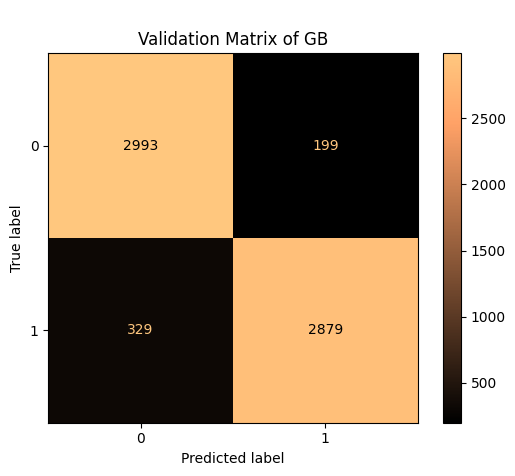

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3230
           1       0.94      0.90      0.92      3170

    accuracy                           0.92      6400
   macro avg       0.92      0.92      0.92      6400
weighted avg       0.92      0.92      0.92      6400



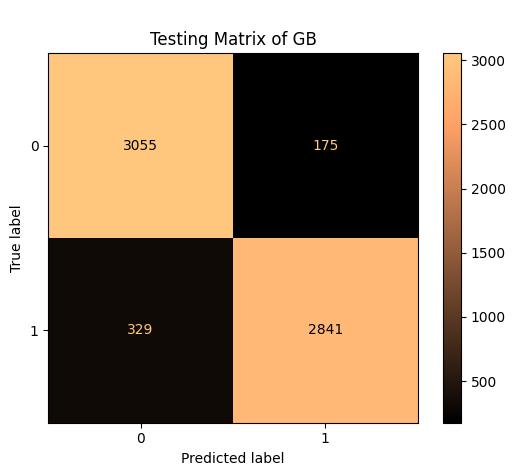

In [ ]:
click_bait_Yoprd = click_bait_MDL.predict(click_bait_Xivn)
print(click_bait_clasficrp(click_bait_Yovn, click_bait_Yoprd))

click_bait_mx = click_bait_cfmtx(click_bait_Yovn, click_bait_Yoprd)
click_bait_cfmdsp(confusion_matrix=click_bait_mx, display_labels=[0, 1]).plot(cmap='copper')
clickbait_mat.title('\nValidation Matrix of GB')
clickbait_mat.show()

click_bait_Yoprd = click_bait_MDL.predict(click_bait_Xits)
print(click_bait_clasficrp(click_bait_Yots, click_bait_Yoprd))

click_bait_mx = click_bait_cfmtx(click_bait_Yots, click_bait_Yoprd)
click_bait_cfmdsp(confusion_matrix=click_bait_mx, display_labels=[0, 1]).plot(cmap='copper')
clickbait_mat.title('\nTesting Matrix of GB')
clickbait_mat.show()